In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "BAC"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,17.990000,18.030001,17.680000,17.900000,15.267409,48951100
2015-01-05,17.790001,17.809999,17.290001,17.379999,14.823895,105605500
2015-01-06,17.420000,17.440001,16.780001,16.860001,14.380368,144912400
2015-01-07,17.139999,17.180000,16.870001,16.940001,14.448604,104603800
2015-01-08,17.160000,17.340000,17.100000,17.290001,14.747125,73388500
...,...,...,...,...,...,...
2023-05-03,28.160000,28.500000,27.809999,27.860001,27.860001,51139500
2023-05-04,27.580000,27.809999,26.830000,26.990000,26.990000,82173800
2023-05-05,27.620001,27.889999,27.469999,27.709999,27.709999,50050100


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2102 entries, 2015-01-02 to 2023-05-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2102 non-null   float64
 1   High       2102 non-null   float64
 2   Low        2102 non-null   float64
 3   Close      2102 non-null   float64
 4   Adj Close  2102 non-null   float64
 5   Volume     2102 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 115.0 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,17.990000,18.030001,17.680000,17.900000,15.267409,48951100
2015-01-05,17.790001,17.809999,17.290001,17.379999,14.823895,105605500
2015-01-06,17.420000,17.440001,16.780001,16.860001,14.380368,144912400
2015-01-07,17.139999,17.180000,16.870001,16.940001,14.448604,104603800
2015-01-08,17.160000,17.340000,17.100000,17.290001,14.747125,73388500


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-03,28.160000,28.500000,27.809999,27.860001,27.860001,51139500
2023-05-04,27.580000,27.809999,26.830000,26.990000,26.990000,82173800
2023-05-05,27.620001,27.889999,27.469999,27.709999,27.709999,50050100
2023-05-08,28.080000,28.150000,27.660000,27.690001,27.690001,34245500
2023-05-09,27.420000,27.830000,27.240000,27.660000,27.660000,32158500


In [7]:
data.shape

(2102, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2.102000e+03
mean,27.668592,27.969734,27.356047,27.661170,25.658779,6.901555e+07
std,8.741403,8.827868,8.647963,8.733310,9.023179,3.548577e+07
min,11.460000,11.550000,10.990000,11.160000,9.634964,1.380540e+07
25%,22.372500,22.722499,22.115000,22.457500,19.871871,4.583760e+07
50%,28.250000,28.620001,27.875000,28.250000,25.815843,5.992950e+07
75%,33.077501,33.400002,32.737500,33.032500,31.657230,8.215132e+07
max,49.910000,50.110001,49.029999,49.380001,47.945423,3.750887e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

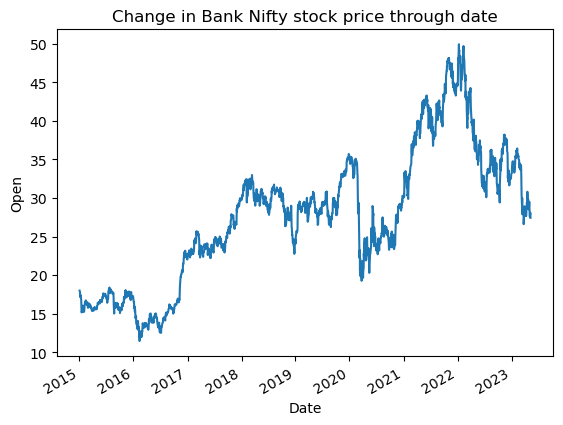

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Bank Nifty stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1576, 3), (526, 3))

In [15]:
y_train.shape,y_test.shape

((1576,), (526,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[24.22530022 32.60609978 16.05050019 40.98050007 24.59080013 37.08090061
 18.12919971 22.73980005 37.57889973 44.0133992  15.46340007 42.41550102
 23.58309992 39.79480042 30.9226001  25.50130026 33.17249943 26.7072999
 31.58629955 15.37990013 33.87369984 29.20300032 24.52489996 17.59470057
 20.37900055 29.43779978 29.67899982 29.82900011 25.72989998 18.68570017
 27.79689995 13.59760007 23.17039974 24.77000025 23.43179993 24.02189983
 30.6689002  31.93799997 31.47720039 31.77720057 28.69730009 16.4589002
 29.17510027 22.61160011 36.33499916 36.45659977 29.37200008 31.43559965
 23.08689991 15.66760006 15.1924     31.90640009 16.63370012 41.03720005
 33.23480003 33.66819923 21.6479999  41.30000061 16.62920019 15.68079984
 26.90800003 29.96839972 47.20580006 39.44890057 33.94120003 24.42450016
 13.53320024 22.40469986 17.08049955 27.1149     41.87000046 38.9380003
 28.07060017 13.5950001  42.43449989 30.0663998  16.76469994 22.62470009
 37.1209008  24.62349998 26.77010021 30.66279955 27.22

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9991896180955979


In [22]:
y_test=list(y_test)

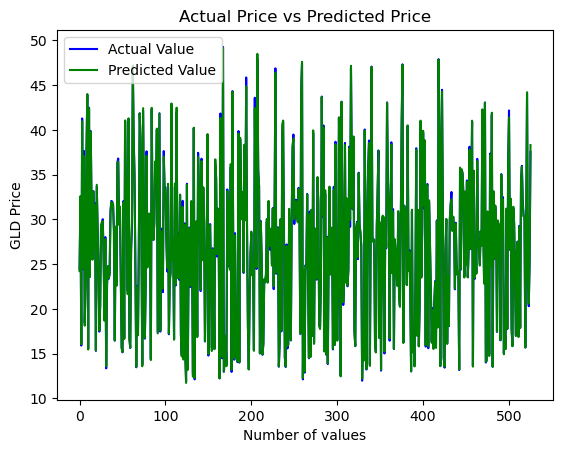

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

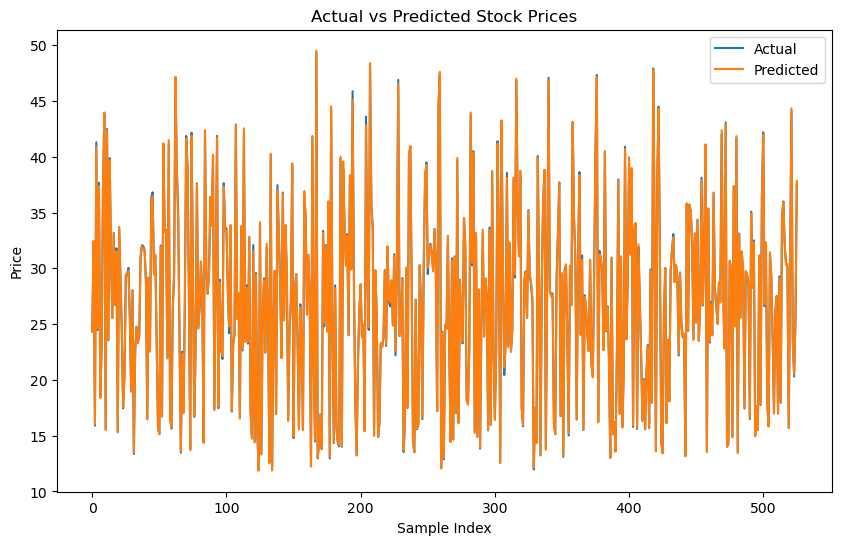

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([17.78773422, 17.42594208, 16.94833104, ..., 27.713613  ,
       27.80980893, 27.59948946])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value343
enter a value35
enter a value43
-129.654589991328


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("BAC_model.pkl",'wb')
pickle.dump(model,file)